In [40]:
#Memanggil lib pandas python untuk membaca table dari frame.len
import pandas as pd
df=pd.read_table("frame.len")

In [41]:
#Menampilkan data frame.len
df.head()

frame.number  frame.len
0             1         60
1             2        132
2             3         60
3             4        175
4             5         60

In [42]:
df["frame.len"].describe()

count    721948.000000
mean        113.373512
std         170.808096
min          42.000000
25%          67.000000
50%          87.000000
75%          90.000000
max        1514.000000
dtype: float64

In [43]:
#memanggil lib pylab,numpy dan grafik matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


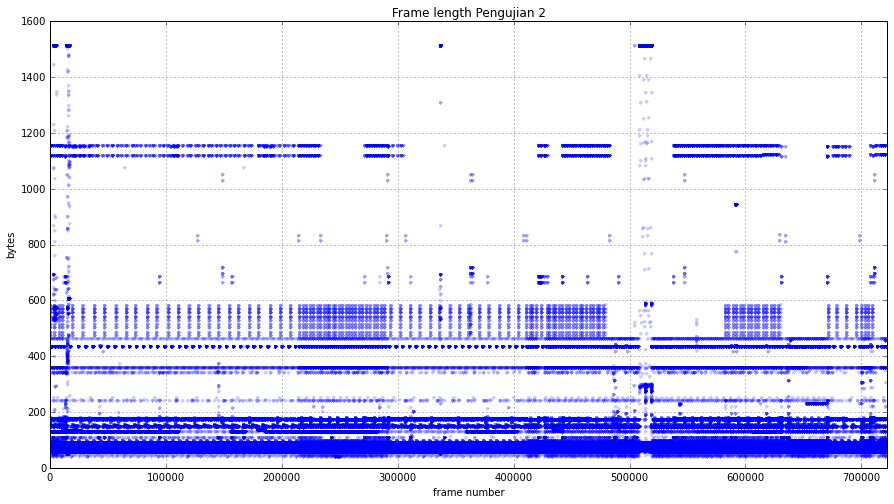

In [44]:
#generate grafik dari data frame.len
df["frame.len"].plot(style=".", alpha=0.2,figsize=(15,8))
title("Frame length Pengujian 2")
ylabel("bytes")
xlabel("frame number")

In [45]:
#Berikut merupakan hasil ektrak dari file pengujian2.pcap

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

In [48]:
#membaca data dari file pengujian2.csv
pengujian1=pd.read_csv("pengujian2.csv", parse_dates=['Time'])
pengujian1.head()

No.                Time             Source                     Destination  \
0    1 2015-12-08 18:10:10     Cisco_50:5c:93  Spanning-tree-(for-bridges)_00   
1    2 2015-12-08 18:10:12      10.100.203.56                 255.255.255.255   
2    3 2015-12-08 18:10:12     Cisco_50:5c:93  Spanning-tree-(for-bridges)_00   
3    4 2015-12-08 18:10:13      10.100.203.55                 239.255.255.250   
4    5 2015-12-08 18:10:13  62:88:d3:49:63:18               Hewlett-_aa:b8:7e   

  Protocol  Length                                               Info  
0      STP      60  Conf. Root = 24576/8/00:1a:2f:c0:79:80  Cost =...  
1      UDP     132        Source port: 49155  Destination port: 10505  
2      STP      60  Conf. Root = 24576/8/00:1a:2f:c0:79:80  Cost =...  
3     SSDP     175                               M-SEARCH * HTTP/1.1   
4      ARP      60         Who has 10.100.203.58?  Tell 10.100.203.61

In [49]:
#Desktripsi dari file ektrak pengujian2.pcap
pengujian1.describe()

No.         Length
count  721948.000000  721948.000000
mean   360974.500000     113.373512
std    208408.580408     170.808096
min         1.000000      42.000000
25%    180487.750000      67.000000
50%    360974.500000      87.000000
75%    541461.250000      90.000000
max    721948.000000    1514.000000

In [50]:
#Deskripsi dari Info dari file pengujian2.pcap
pengujian1['Info'].describe()

count                                   721796
unique                                   50707
top       Multicast Listener Report Message v2
freq                                     81031
dtype: object

In [51]:
#Menampilkan data tertentu berupa Time,Source IP, Destination IP, Protocol,Length,Info dari file pengujian1
infodata = pengujian1[['Time','Source','Destination','Protocol',
                  'Length','Info']]

In [52]:
infodata.head()

Time             Source                     Destination  \
0 2015-12-08 18:10:10     Cisco_50:5c:93  Spanning-tree-(for-bridges)_00   
1 2015-12-08 18:10:12      10.100.203.56                 255.255.255.255   
2 2015-12-08 18:10:12     Cisco_50:5c:93  Spanning-tree-(for-bridges)_00   
3 2015-12-08 18:10:13      10.100.203.55                 239.255.255.250   
4 2015-12-08 18:10:13  62:88:d3:49:63:18               Hewlett-_aa:b8:7e   

  Protocol  Length                                               Info  
0      STP      60  Conf. Root = 24576/8/00:1a:2f:c0:79:80  Cost =...  
1      UDP     132        Source port: 49155  Destination port: 10505  
2      STP      60  Conf. Root = 24576/8/00:1a:2f:c0:79:80  Cost =...  
3     SSDP     175                               M-SEARCH * HTTP/1.1   
4      ARP      60         Who has 10.100.203.58?  Tell 10.100.203.61

In [53]:
#Soure IP,destination IP dan Protocol di kelompokkan kemudian panjang paket di jumlahkan
category_group=infodata.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

Length
Source                             Destination     Protocol        
0.0.0.0                            224.0.0.1       IGMPv2     93306
                                   255.255.255.255 DHCP       65267
0:4000:102:417::e000:1             ff02::1         ICMPv6       172
0:4000:4011:8fb2:a64:cb1d:a64:cb0a ff02::1         ICMPv6        86
10.100.130.10                      10.100.203.58   DNS          340

In [54]:
#my_plot = category_group.plot(kind='pie',autopct='%.2f', fontsize=20,subplots=True, figsize=(90,90))

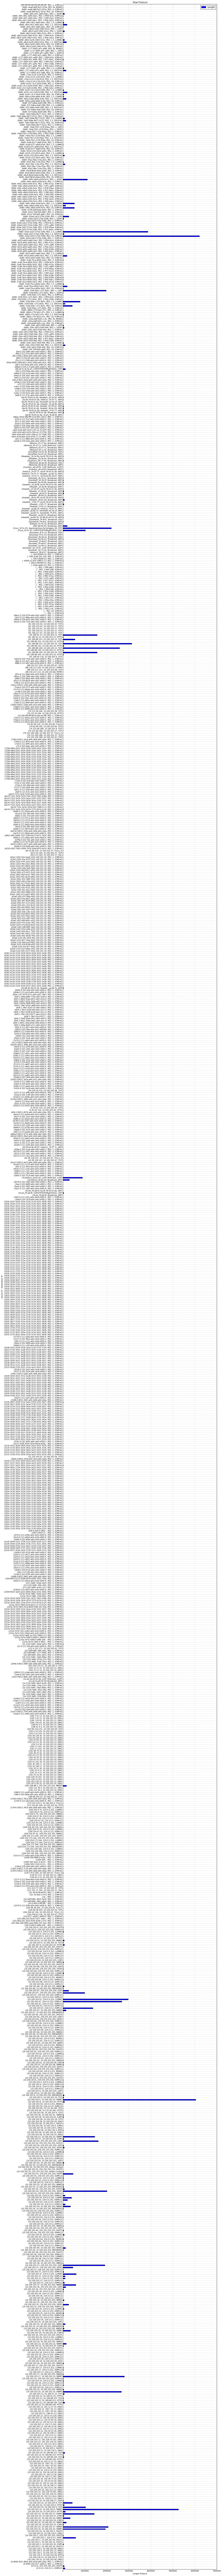

In [55]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Total Protocol",figsize=(15, 250))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [56]:
category_group.unstack().head()

Length             \
Protocol                                            ADwin Config  ARP  BJNP   
Source                             Destination                                
0.0.0.0                            224.0.0.1                 NaN  NaN   NaN   
                                   255.255.255.255           NaN  NaN   NaN   
0:4000:102:417::e000:1             ff02::1                   NaN  NaN   NaN   
0:4000:4011:8fb2:a64:cb1d:a64:cb0a ff02::1                   NaN  NaN   NaN   
10.100.130.10                      10.100.203.58             NaN  NaN   NaN   

                                                                         \
Protocol                                            BROWSER  CDP   DHCP   
Source                             Destination                            
0.0.0.0                            224.0.0.1            NaN  NaN    NaN   
                                   255.255.255.255      NaN  NaN  65267   
0:4000:102:417::e000:1             ff02::1              NaN  NaN    NaN   
0:4000:4011:8fb2:a64:cb1d:a64:cb0a ff02::1              NaN  NaN    NaN   
10.100.130.10                      10.100.203.58        NaN  NaN    NaN   

                                                                             \
Protocol                                            DHCPv6  DNS  HTTP  ICMP   
Source                             Destination                                
0.0.0.0                            224.0.0.1           NaN  NaN   NaN   NaN   
                                   255.255.255.255     NaN  NaN   NaN   NaN   
0:4000:102:417::e000:1             ff02::1             NaN  NaN   NaN   NaN   
0:4000:4011:8fb2:a64:cb1d:a64:cb0a ff02::1             NaN  NaN   NaN   NaN   
10.100.130.10                      10.100.203.58       NaN  340   NaN   NaN   

                                                    ...                    \
Protocol                                            ...   SNMP  SSDP  SSH   
Source                             Destination      ...                     
0.0.0.0                            224.0.0.1        ...    NaN   NaN  NaN   
                                   255.255.255.255  ...    NaN   NaN  NaN   
0:4000:102:417::e000:1             ff02::1          ...    NaN   NaN  NaN   
0:4000:4011:8fb2:a64:cb1d:a64:cb0a ff02::1          ...    NaN   NaN  NaN   
10.100.130.10                      10.100.203.58    ...    NaN   NaN  NaN   

                                                                          \
Protocol                                            SSL  STP  TCP  TLSv1   
Source                             Destination                             
0.0.0.0                            224.0.0.1        NaN  NaN  NaN    NaN   
                                   255.255.255.255  NaN  NaN  NaN    NaN   
0:4000:102:417::e000:1             ff02::1          NaN  NaN  NaN    NaN   
0:4000:4011:8fb2:a64:cb1d:a64:cb0a ff02::1          NaN  NaN  NaN    NaN   
10.100.130.10                      10.100.203.58    NaN  NaN  NaN    NaN   

                                                                       
Protocol                                            TLSv1.2  UDP  XID  
Source                             Destination                         
0.0.0.0                            224.0.0.1            NaN  NaN  NaN  
                                   255.255.255.255      NaN  NaN  NaN  
0:4000:102:417::e000:1             ff02::1              NaN  NaN  NaN  
0:4000:4011:8fb2:a64:cb1d:a64:cb0a ff02::1              NaN  NaN  NaN  
10.100.130.10                      10.100.203.58        NaN  NaN  NaN  

[5 rows x 31 columns]

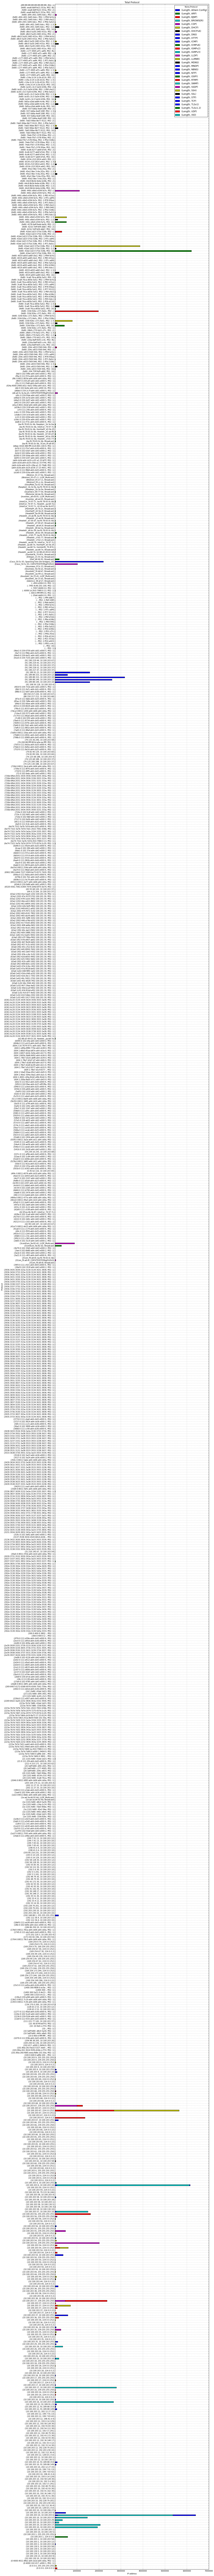

In [57]:
my_plot = category_group.unstack().plot(kind='barh',stacked=True,title="Total Protocol",figsize=(15, 250))
my_plot.set_xlabel("IP address")
my_plot.set_ylabel("Protocol")

In [58]:
infodata2 = pengujian1[['Time','Length','Info']]
infodata2.head()

Time  Length  \
0 2015-12-08 18:10:10      60   
1 2015-12-08 18:10:12     132   
2 2015-12-08 18:10:12      60   
3 2015-12-08 18:10:13     175   
4 2015-12-08 18:10:13      60   

                                                Info  
0  Conf. Root = 24576/8/00:1a:2f:c0:79:80  Cost =...  
1        Source port: 49155  Destination port: 10505  
2  Conf. Root = 24576/8/00:1a:2f:c0:79:80  Cost =...  
3                               M-SEARCH * HTTP/1.1   
4         Who has 10.100.203.58?  Tell 10.100.203.61

In [59]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

Length                                               Info
Time                                                                          
2015-12-08 18:10:10      60  Conf. Root = 24576/8/00:1a:2f:c0:79:80  Cost =...
2015-12-08 18:10:12     132        Source port: 49155  Destination port: 10505
2015-12-08 18:10:12      60  Conf. Root = 24576/8/00:1a:2f:c0:79:80  Cost =...
2015-12-08 18:10:13     175                               M-SEARCH * HTTP/1.1 
2015-12-08 18:10:13      60         Who has 10.100.203.58?  Tell 10.100.203.61

In [60]:
infodata2.resample('T',how=sum).head()

Length
Time                       
2015-12-08 18:10:00   48347
2015-12-08 18:11:00   26280
2015-12-08 18:12:00   16707
2015-12-08 18:13:00   36184
2015-12-08 18:14:00   28329

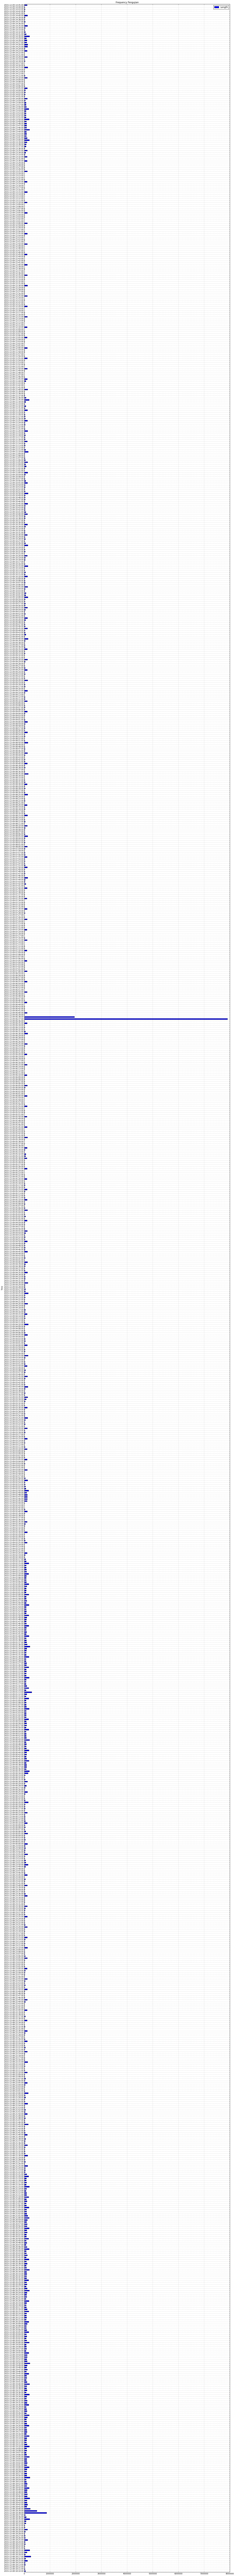

In [61]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frequency Pengujian",style="r",figsize=(20,250))

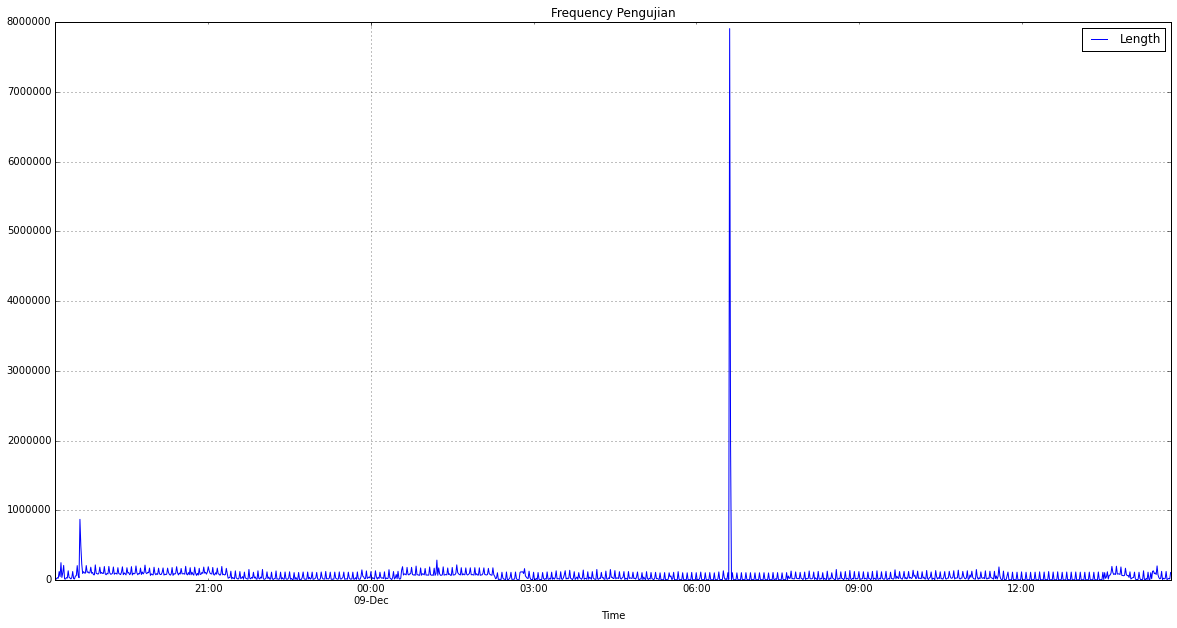

In [65]:
infodata2_plot = infodata2.resample('T',how=sum).plot(title="Frequency Pengujian",figsize=(20,10))